## Marketing Data - Customer Segmentation Analysis

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the preprocessed data

df = pd.read_csv('processed_marketing_data.csv')

In [3]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_Spent,Avg_Spent_Per_Purchase,Preferred_Channel,Preferred_Product,Campaign_Response_Rate,Recency_Score,Spending_Segment,Has_Children,Total_Children,Customer_Value
0,58138.0,0,0,58,635,88,546,172,88,88,...,1617,64.680000,Catalog,Wines,0.166667,41,High Spender,0,0,76322.4
1,46344.0,1,1,38,11,1,6,2,1,6,...,27,4.500000,Store,Wines,0.000000,61,Low Spender,1,2,0.0
2,71613.0,0,0,26,426,49,127,111,21,42,...,776,36.952381,Store,Wines,0.000000,73,Medium Spender,0,0,0.0
3,26646.0,1,0,26,11,4,20,10,3,5,...,53,6.625000,Store,MeatProducts,0.000000,73,Low Spender,1,1,0.0
4,58293.0,1,0,94,173,43,118,46,27,15,...,422,22.210526,Store,Wines,0.000000,5,Low Spender,1,1,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Income                  2205 non-null   float64
 1   Kidhome                 2205 non-null   int64  
 2   Teenhome                2205 non-null   int64  
 3   Recency                 2205 non-null   int64  
 4   MntWines                2205 non-null   int64  
 5   MntFruits               2205 non-null   int64  
 6   MntMeatProducts         2205 non-null   int64  
 7   MntFishProducts         2205 non-null   int64  
 8   MntSweetProducts        2205 non-null   int64  
 9   MntGoldProds            2205 non-null   int64  
 10  NumDealsPurchases       2205 non-null   int64  
 11  NumWebPurchases         2205 non-null   int64  
 12  NumCatalogPurchases     2205 non-null   int64  
 13  NumStorePurchases       2205 non-null   int64  
 14  NumWebVisitsMonth       2205 non-null   

### Prepare data for clustering

In [5]:
# Select features for clustering
cluster_features = [
    'Income', 'Customer_Days', 'Age', 'Total_Spent',
    'Total_Purchases', 'Avg_Spent_Per_Purchase', 'Campaign_Response_Rate',
    'Total_Children', 'NumWebVisitsMonth']

In [6]:
# Remove any rows with NaN values in the selected features
df_cluster = df[cluster_features].dropna()

In [7]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

### K-Means Clustering

In [8]:
# Find optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

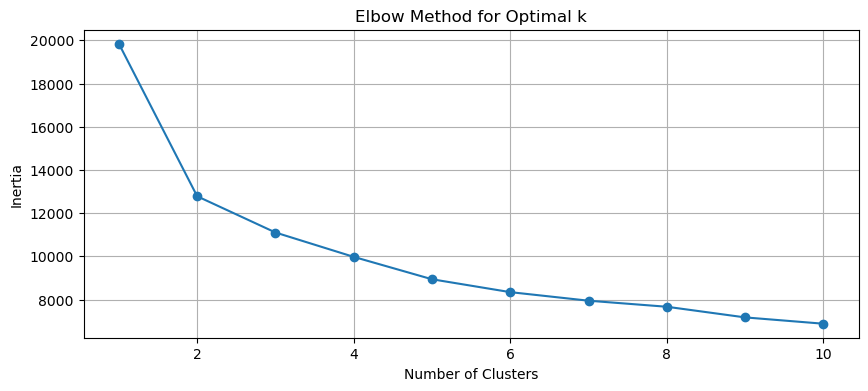

In [12]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [13]:
# Based on the elbow curve, choose the optimal number of clusters
# Let's assume the optimal k is 4 (adjust based on your results)
optimal_k = 4  # Change this based on your elbow curve

In [14]:
# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

In [15]:
# Add cluster labels to the original dataframe
df_cluster['Cluster'] = clusters

In [16]:
## Analyze the clusters
# Calculate cluster centers in original scale
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                               columns=cluster_features)

In [17]:
# Display cluster centers
print("Cluster Centers:")
display(cluster_centers.round(2))

Cluster Centers:


,Income,Customer_Days,Age,Total_Spent,Total_Purchases,Avg_Spent_Per_Purchase,Campaign_Response_Rate,Total_Children,NumWebVisitsMonth
0,80869.42,2564.31,48.86,1687.07,20.50,85.84,0.41,0.18,3.30
1,34189.97,2473.22,48.04,98.81,7.96,11.04,0.03,1.23,6.46
2,72875.49,2433.57,53.93,1121.18,19.98,57.27,0.04,0.29,2.39
3,56934.33,2619.00,55.29,753.40,21.51,34.15,0.06,1.19,6.14


In [18]:
# Calculate cluster sizes
cluster_sizes = df_cluster['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
display(cluster_sizes)


Cluster Sizes:


Cluster
0     207
1    1016
2     404
3     578
Name: count, dtype: int64

In [19]:
# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [20]:
# Create a dataframe with PCA results
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

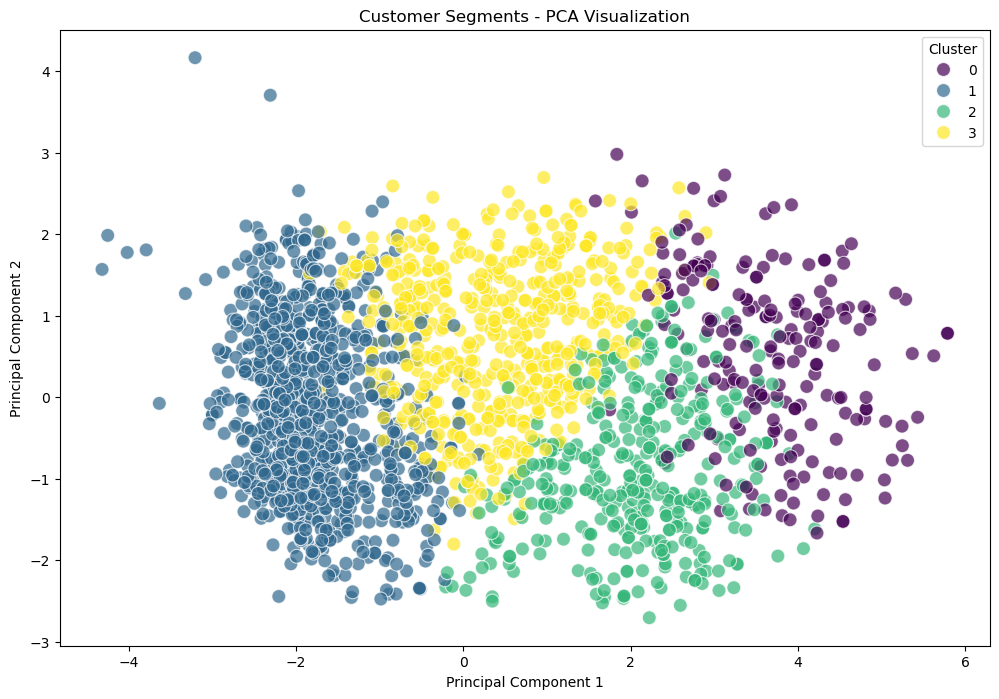

In [21]:
# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Detailed cluster analysis

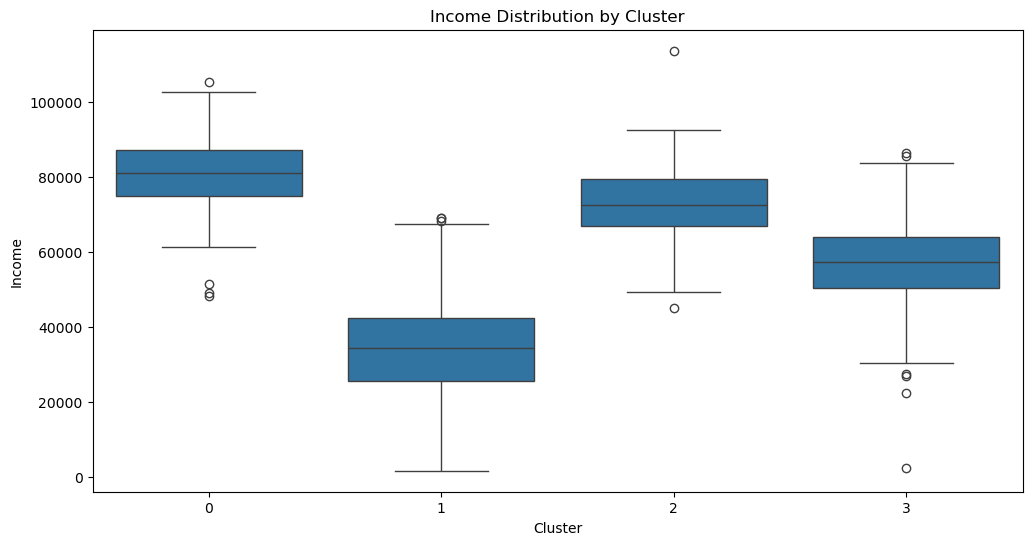

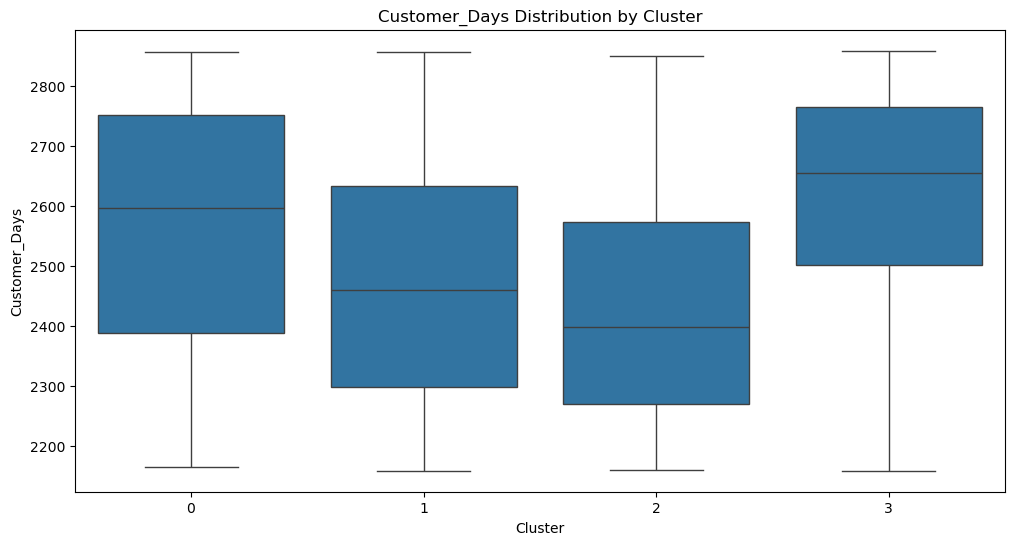

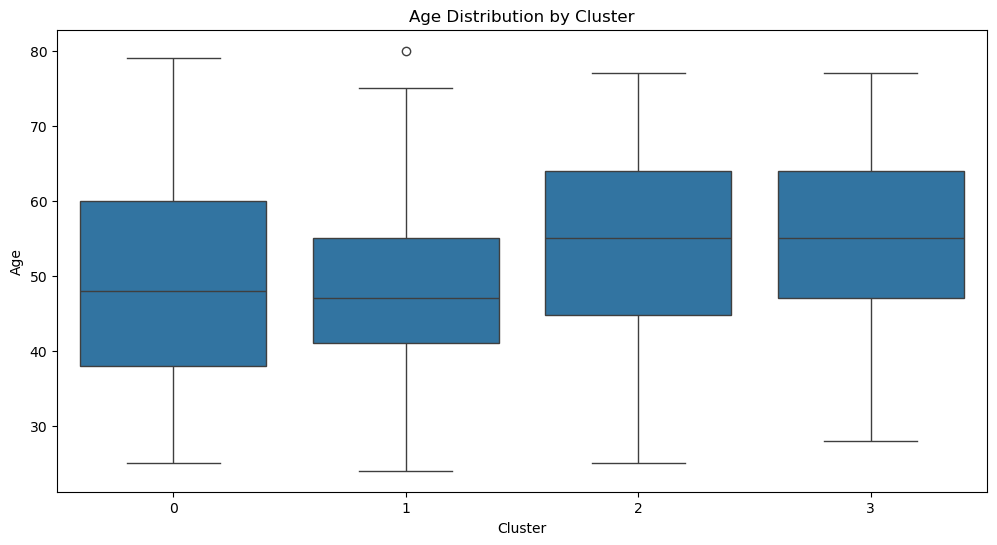

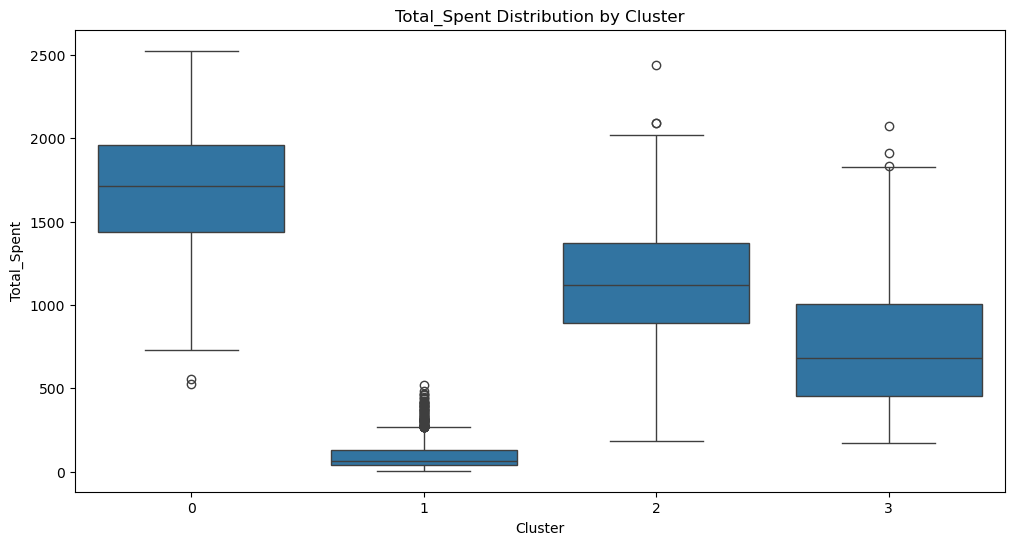

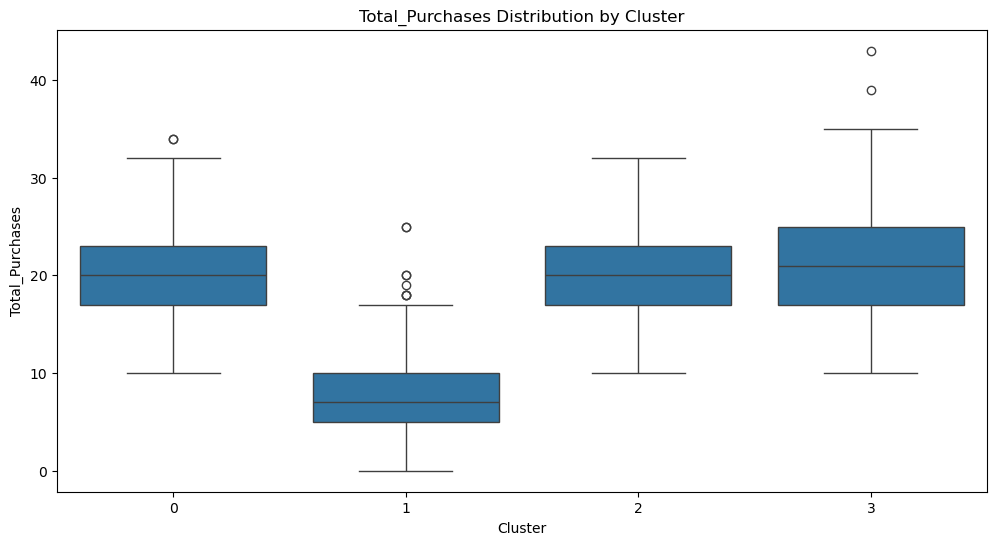

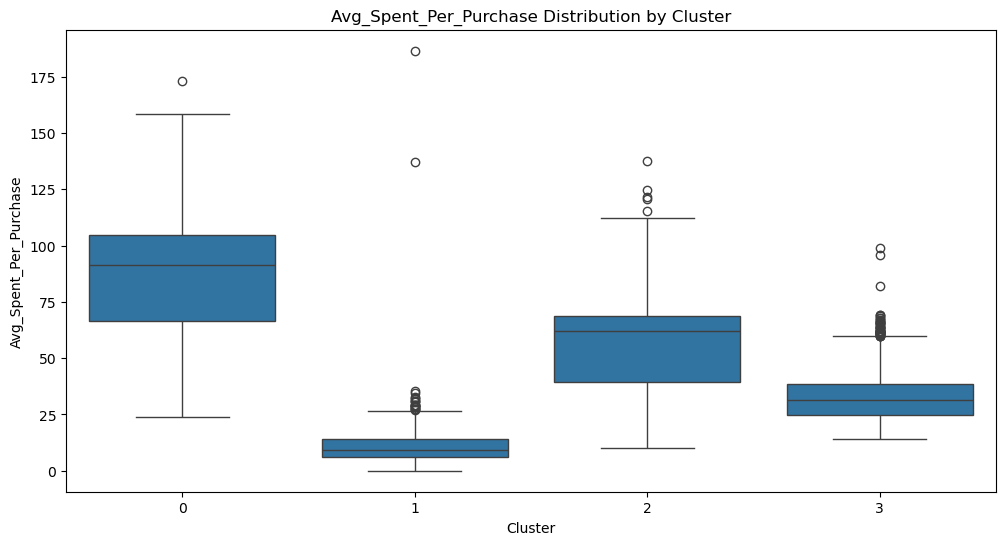

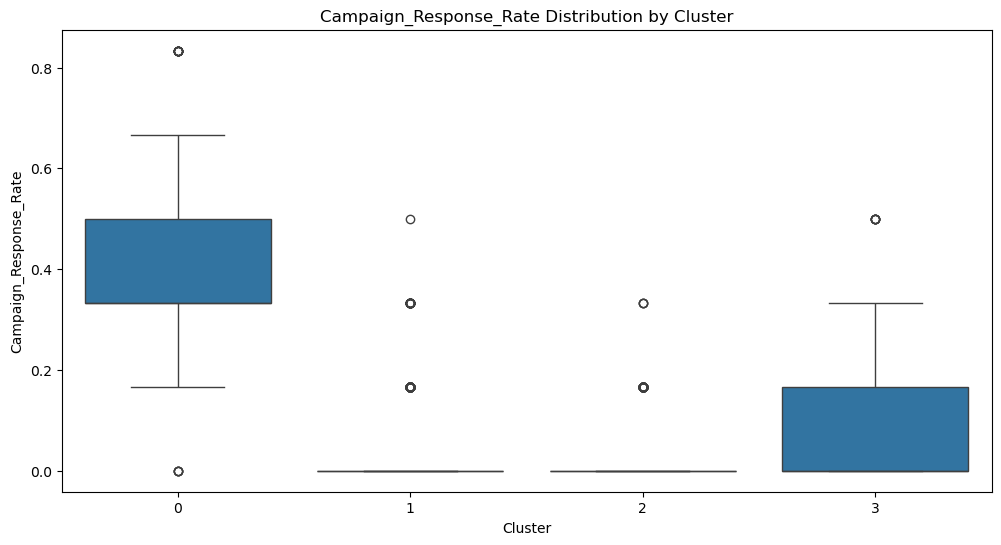

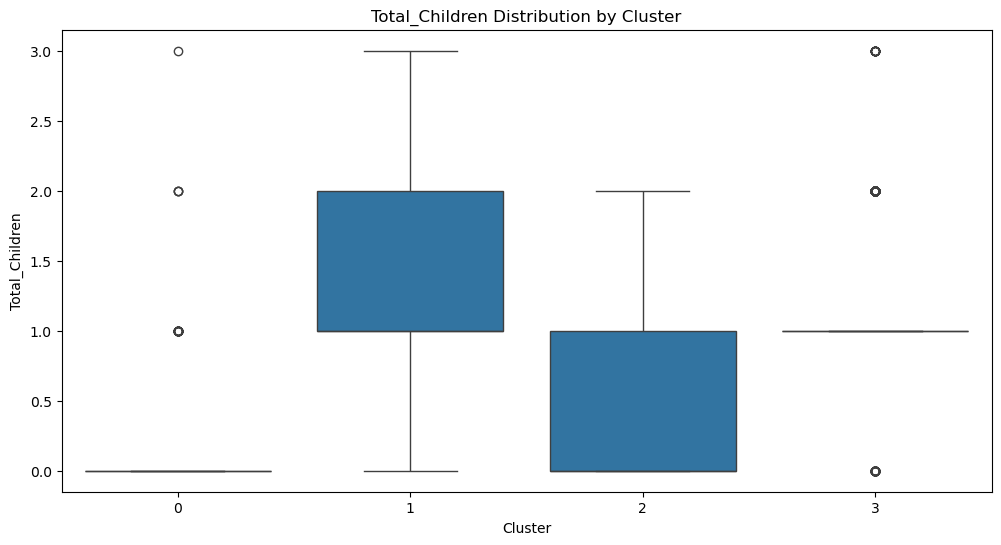

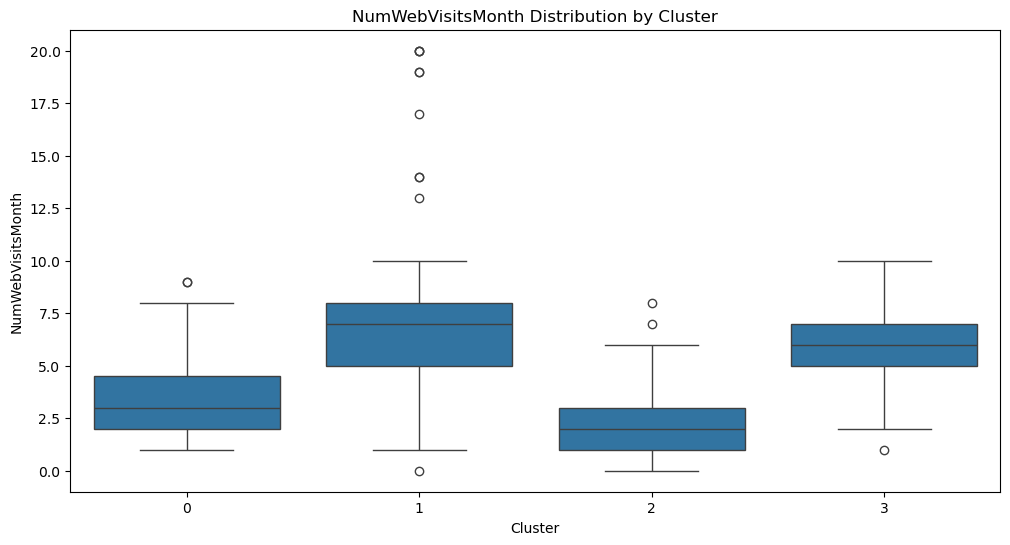

In [22]:
# Plot feature distributions by cluster
for feature in cluster_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=feature, data=df_cluster)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xticks(rotation=0)
    plt.show()

In [23]:
# Radar chart for cluster profiles
def radar_chart(df, cluster_col):
    # Calculate mean values for each feature by cluster
    cluster_means = df.groupby(cluster_col).mean().reset_index()
    
    # Set up the radar chart
    categories = df.columns[:-1]  # All columns except the cluster column
    N = len(categories)
    
    # Create angles for each feature
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Add feature labels
    plt.xticks(angles[:-1], categories, size=12)
    
    # Draw cluster profiles
    unique_clusters = sorted(df[cluster_col].unique())
    for i, cluster in enumerate(unique_clusters):
        values = cluster_means[cluster_means[cluster_col] == cluster].iloc[0].drop(cluster_col).values.tolist()
        values += values[:1]  # Complete the circle
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.1)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Cluster Profiles', size=15)
    
    return fig, ax

In [24]:
# Standardize the data for radar chart
df_radar = df_cluster.copy()
for col in df_radar.columns[:-1]:  # Exclude the Cluster column
    df_radar[col] = (df_radar[col] - df_radar[col].min()) / (df_radar[col].max() - df_radar[col].min())

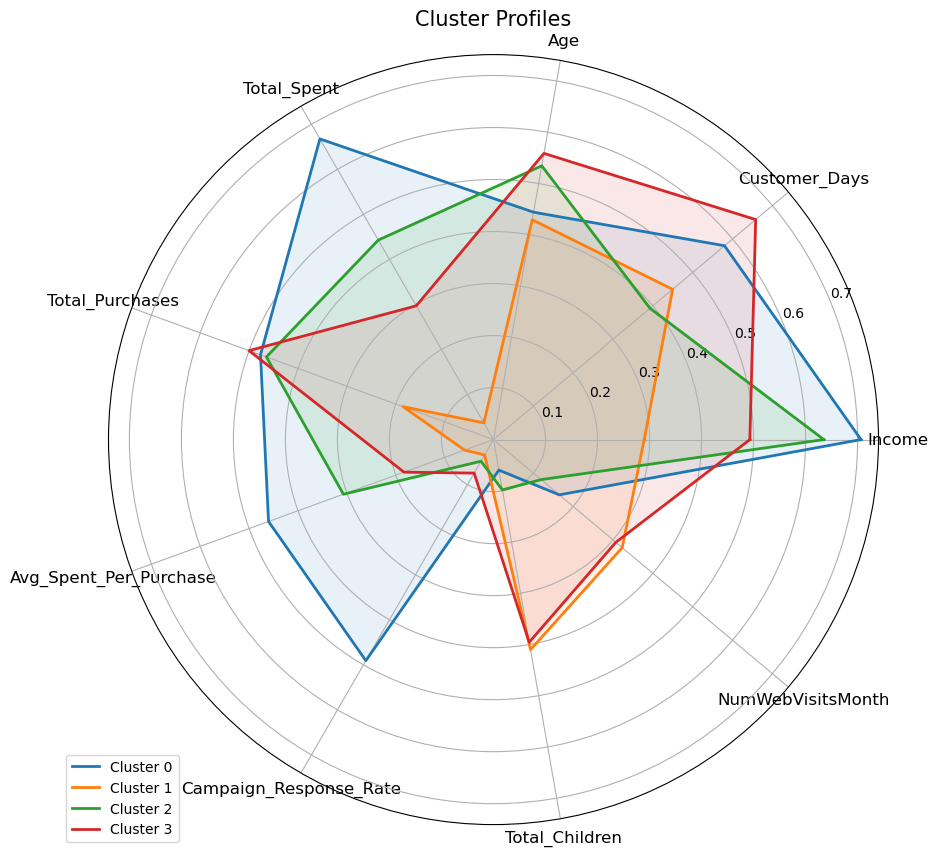

In [25]:
# Plot the radar chart
radar_fig, radar_ax = radar_chart(df_radar, 'Cluster')
plt.show()

### Cluster Interpretation

In [26]:
# Define cluster profiles based on analysis
cluster_profiles = {
    0: "Profile for Cluster 0",
    1: "Profile for Cluster 1",
    2: "Profile for Cluster 2",
    3: "Profile for Cluster 3"
}

In [27]:
# Display cluster profiles
for cluster, profile in cluster_profiles.items():
    print(f"Cluster {cluster}: {profile}")

Cluster 0: Profile for Cluster 0
Cluster 1: Profile for Cluster 1
Cluster 2: Profile for Cluster 2
Cluster 3: Profile for Cluster 3


In [28]:
# Add cluster labels to original dataframe for later use in modeling
# Create a mapping dictionary from cluster dataframe to full dataframe
df_mapping = df_cluster[['Cluster']].reset_index()
df['Customer_Segment'] = None
for i, row in df_mapping.iterrows():
    df.loc[row['index'], 'Customer_Segment'] = f"Segment_{row['Cluster']}"

In [29]:
# Save the segmented data
df.to_csv('segmented_marketing_data.csv', index=False)

print("Customer segmentation complete. Segmented data saved to 'segmented_marketing_data.csv'")

Customer segmentation complete. Segmented data saved to 'segmented_marketing_data.csv'
